<a href="https://colab.research.google.com/github/MertYuksek/Image-Transformation/blob/main/imageTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import torch 

import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
# The list of datasets that come with torchvision: https://pytorch.org/vision/stable/index.html

In [2]:
# download the CIFAR10 dataset
cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True)

print(cdata)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting cifar10/cifar-10-python.tar.gz to cifar10
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [5]:
# shape of the dataset
print(cdata.data.shape) # 50k picture, 32 x 32, RGB

# number of classses
print(cdata.classes)

# targets is a list of targets converted to ints
print( len(cdata.targets) )

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


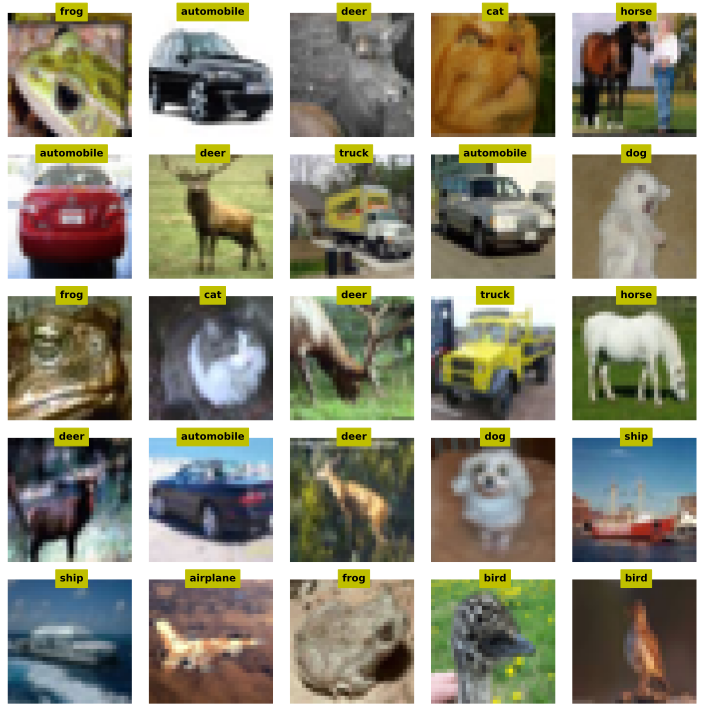

In [6]:
# inspect a few random images

fig,axs = plt.subplots(5,5,figsize=(10,10))

for ax in axs.flatten():

  # select a random picture
  randidx = np.random.choice(len(cdata.targets))

  # extract that image
  pic = cdata.data[randidx,:,:,:]
  # and its label
  label = cdata.classes[cdata.targets[randidx]]

  # and show!
  ax.imshow(pic)
  ax.text(16,0,label,ha='center',fontweight='bold',color='k',backgroundcolor='y')
  ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
Ts = T.Compose([ T.ToTensor(), # convert numpy array to tensor, scaling 0-255 to 0-1
                 T.Resize(32*4), # 120x120
                 T.Grayscale(num_output_channels=1)  ])

# include the transform in the dataset
cdata.transform = Ts # here we assign transform to cdata. Cdata is not changed.
print(cdata.data[123,:,:,:].shape)

(32, 32, 3)


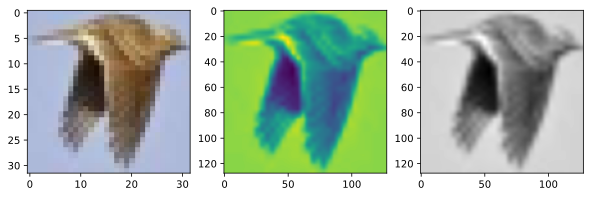

In [10]:
# apply the transform

# option 1a: apply the transform "externally" to an image
img1 = Ts( cdata.data[123, :, :, :] )

# option 1b: use the embedded transform
img2 = cdata.transform( cdata.data[123,:,:,:] )

fig,ax = plt.subplots(1,3,figsize=(10,3))
ax[0].imshow(cdata.data[123,:,:,:]) # numy array
ax[1].imshow(torch.squeeze(img1)) # tensor you should squeeze
ax[2].imshow(torch.squeeze(img2),cmap='gray')

plt.show()